# Avaliação 1

Essa avaliação consiste em uma análise do data set: “Iris Flower Data Set”

Alunos: Guilherme Prazeres Matos de Souza e Joaquim Luiz Oliveira Neto

## Questão 1

In [1]:
# Blibliotecas necessarias e dependencias

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


# Load CSV file into a pandas DataFrame
iris = pd.read_csv('iris.csv')

# Tradução dos nomes dos atributos
traducoes = {
    'sepal_length': 'Comprimento da Sépala',
    'sepal_width': 'Largura da Sépala',
    'petal_length': 'Comprimento da Pétala',
    'petal_width': 'Largura da Pétala'
}

### a.

O data set apresenta atributos **Multivariados** <br>
onde tem **4 Atributos preditivos e  1 Atributo Alvo**

### b.

A classe é simbólica com escala **nominal**, pois ela representa com um nome a flor, já os outros 4 atributos, são numéricos, com escala **racional**, já que se tratam de medidas de dimensão, avaliados em centímetro como unidade.

### c.

#### Balanceamento dos dados

In [20]:
# Frequencia dos dados
type_counts = iris['species'].value_counts()

print("Quatidade de amostras por espécie:")
for atributo, valor in type_counts.items():
    atributo_traduzido = traducoes.get(atributo, atributo.capitalize())
    print(f"{atributo_traduzido}: {valor}")

Quatidade de amostras por espécie:
Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50


Como pode ser observado acima, os dados já estão balanceados tendo 50 amostras de cada espécie <br>
Realizando os cálculos podemos ver as estatíscas pertinentes sobre a data base <br>

#### Média dos atributos

In [21]:
# Calculo da media

mean = iris.mean(numeric_only=True).round(2)

print("Média das características:")
for atributo, valor in mean.items():
    atributo_traduzido = traducoes.get(atributo, atributo.capitalize())
    print(f"{atributo_traduzido}: {valor}")


Média das características:
Comprimento da Sépala: 5.84
Largura da Sépala: 3.05
Comprimento da Pétala: 3.76
Largura da Pétala: 1.2


#### O Desvio padrão dos dados

In [22]:
# Calculo do desvio padrão

std = iris.std(numeric_only=True).round(2)

# Calculando o desvio padrão de cada atributo por tipo de flor
print("Desvio padrão das características:")
for atributo, valor in std.items():
    atributo_traduzido = traducoes.get(atributo, atributo.capitalize())
    print(f"{atributo_traduzido}: {valor}")


Desvio padrão das características:
Comprimento da Sépala: 0.83
Largura da Sépala: 0.43
Comprimento da Pétala: 1.76
Largura da Pétala: 0.76


#### Calculando a mediana dos dados

In [23]:
# Calculo a mediana

# Calculando a mediana de cada atributo por tipo de flor
median = iris.median(numeric_only=True).round(2)

print("Mediana das características:")
for atributo, valor in median.items():
    atributo_traduzido = traducoes.get(atributo, atributo.capitalize())
    print(f"{atributo_traduzido}: {valor}")



Mediana das características:
Comprimento da Sépala: 5.8
Largura da Sépala: 3.0
Comprimento da Pétala: 4.35
Largura da Pétala: 1.3


#### Calculando a obliquidade dos dados

In [24]:
 # Calculo da skewness

def skewness(atributo):
    mean_petal_length = iris[atributo].mean()
    std_petal_length = iris[atributo].std()

    return (((iris[atributo] - mean_petal_length) ** 3).mean()) / (std_petal_length ** 3)

print(f"Assimetria do comprimento da pétala: {skewness('petal_length'):.2f}")
print(f"Assimetria da largura da pétala: {skewness('petal_width'):.2f}")
print(f"Assimetria do comprimento da sépala: {skewness('sepal_length'):.2f}")
print(f"Assimetria do largura da sépala: {skewness('sepal_width'):.2f}")


Assimetria do comprimento da pétala: -0.27
Assimetria da largura da pétala: -0.10
Assimetria do comprimento da sépala: 0.31
Assimetria do largura da sépala: 0.33


#### Calculando a Curtose dos dados

In [25]:
# Calculo da Curtose

def curtose(atributo):
    mean = iris[atributo].mean()
    std = iris[atributo].std()
    n = len(iris[atributo])
    
    return (((iris[atributo] - mean) ** 4).mean() / (std ** 4)) - 3

print(f"Curtose do comprimento da pétala: {curtose('petal_length'):.2f}")
print(f"Curtose da largura da pétala: {curtose('petal_width'):.2f}")
print(f"Curtose do comprimento da sépala: {curtose('sepal_length'):.2f}")
print(f"Curtose da largura da sépala: {curtose('sepal_width'):.2f}")


Curtose do comprimento da pétala: -1.42
Curtose da largura da pétala: -1.36
Curtose do comprimento da sépala: -0.61
Curtose da largura da sépala: 0.20


### d.

#### Incompletude

In [26]:
# Printa valores ausentes

print("Contagem de valores ausentes por atributo:")
for atributo, valor in iris.isnull().sum().items():
    atributo_traduzido = traducoes.get(atributo, atributo.capitalize())
    print(f"{atributo_traduzido}: {valor}")


Contagem de valores ausentes por atributo:
Comprimento da Sépala: 0
Largura da Sépala: 0
Comprimento da Pétala: 0
Largura da Pétala: 0
Species: 0


É possivel ver que não há dados incompletos no data base

#### Scatter Plot

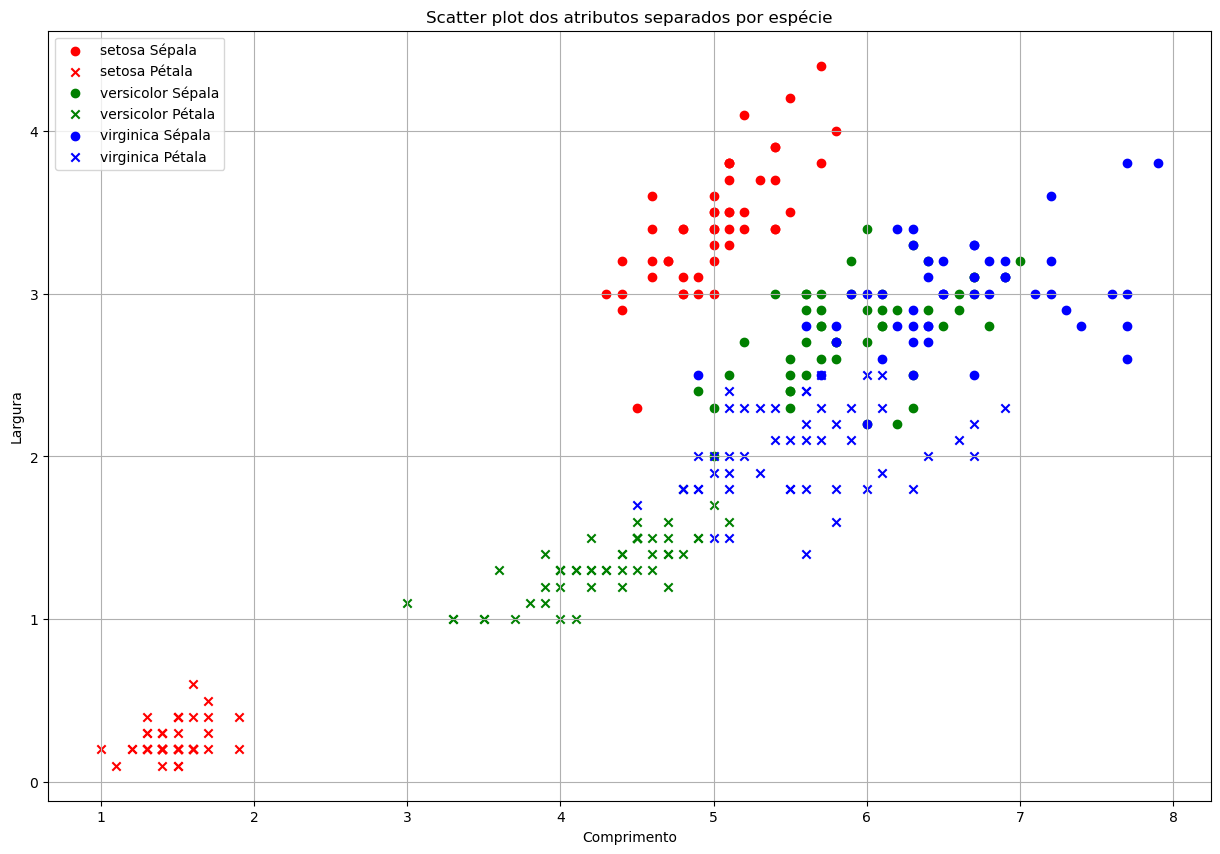

In [55]:
# ScatterPlot
# Definindo cores para cada espécie
cores = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

# Scatter plot
plt.figure(figsize=(15, 10))

for especie, cor in cores.items():
    subset = iris[iris['species'] == especie]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=especie + ' Sépala', color=cor, marker='o')
    plt.scatter(subset['petal_length'], subset['petal_width'], label=especie + ' Pétala', color=cor, marker='x')

plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.title('Scatter plot dos atributos separados por espécie')
plt.legend()
plt.grid(True)
plt.show()



Com o grafico de dispersão, é possivel ver que existe um certo ruido na Sépala da virginica, e na Sépala da setosa. Na questão f. é possivel ver mais claramente essas outlier

#### Redundâncias

In [49]:
# Imprimir a contagem de linhas duplicadas
print("Contagem de linhas duplicadas:", iris.duplicated().sum())

# Remover linhas duplicadas
iris = iris.drop_duplicates()

print("\nLinhas duplicadas removidas. Novo tamanho do DataFrame:", len(iris))


Contagem de linhas duplicadas: 3

Linhas duplicadas removidas. Novo tamanho do DataFrame: 147


É possivel notar a presenção de dados redundantes, que pode ser retirada do Data Base

### e.

#### Matriz de covariância e correlação

In [4]:
# Selecionar apenas os atributos quantitativos
atributos_quantitativos = iris[['sepal_length', 'petal_length', 'sepal_width', 'petal_width']]

# Calcular a matriz de covariância
covariancia = atributos_quantitativos.cov()

# Calcular a matriz de correlação
correlacao = atributos_quantitativos.corr()

print("Matriz de Covariância:")
print(covariancia)
print("\nMatriz de Correlação:")
print(correlacao)


Matriz de Covariância:
              sepal_length  petal_length  sepal_width  petal_width
sepal_length      0.685694      1.273682    -0.039268     0.516904
petal_length      1.273682      3.113179    -0.321713     1.296387
sepal_width      -0.039268     -0.321713     0.188004    -0.117981
petal_width       0.516904      1.296387    -0.117981     0.582414

Matriz de Correlação:
              sepal_length  petal_length  sepal_width  petal_width
sepal_length      1.000000      0.871754    -0.109369     0.817954
petal_length      0.871754      1.000000    -0.420516     0.962757
sepal_width      -0.109369     -0.420516     1.000000    -0.356544
petal_width       0.817954      0.962757    -0.356544     1.000000


Analisando a matriz e também o mapa de calor abaixo, conseguimos confirmar um correlação alta entre o comprimento e largura da petála, por outro lado, há uma correlação baixíssima, indicando que eles tem uma relação indireta

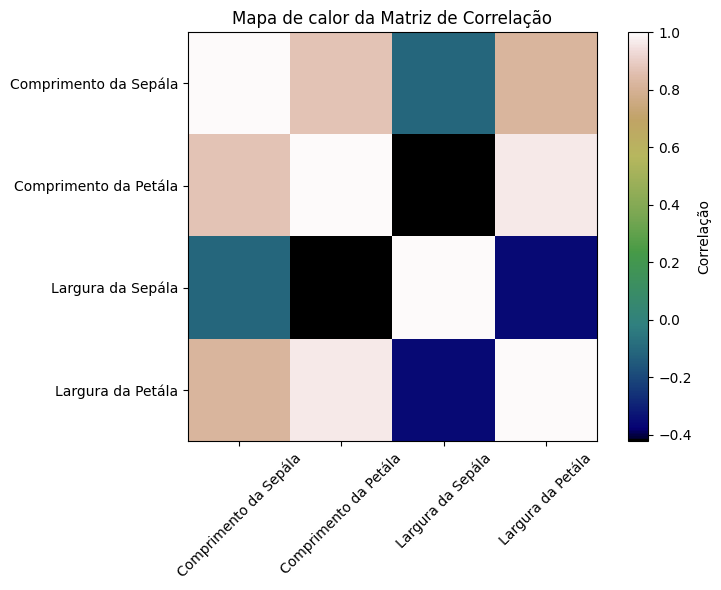

In [8]:
rotulo2 = ['Comprimento da Sepála','Comprimento da Petála','Largura da Sepála','Largura da Petála']
plt.figure(figsize=(8, 6))
plt.imshow(correlacao, cmap='gist_earth', interpolation='nearest')
plt.colorbar(label='Correlação')
plt.title('Mapa de calor da Matriz de Correlação')
plt.xticks(np.arange(len(iris.drop(columns=['species']).columns)), rotulo2, rotation=45)
plt.yticks(np.arange(len(iris.drop(columns=['species']).columns)), rotulo2)
plt.tight_layout()
plt.show()

### f.

#### Boxplot para cada atributo preditivo

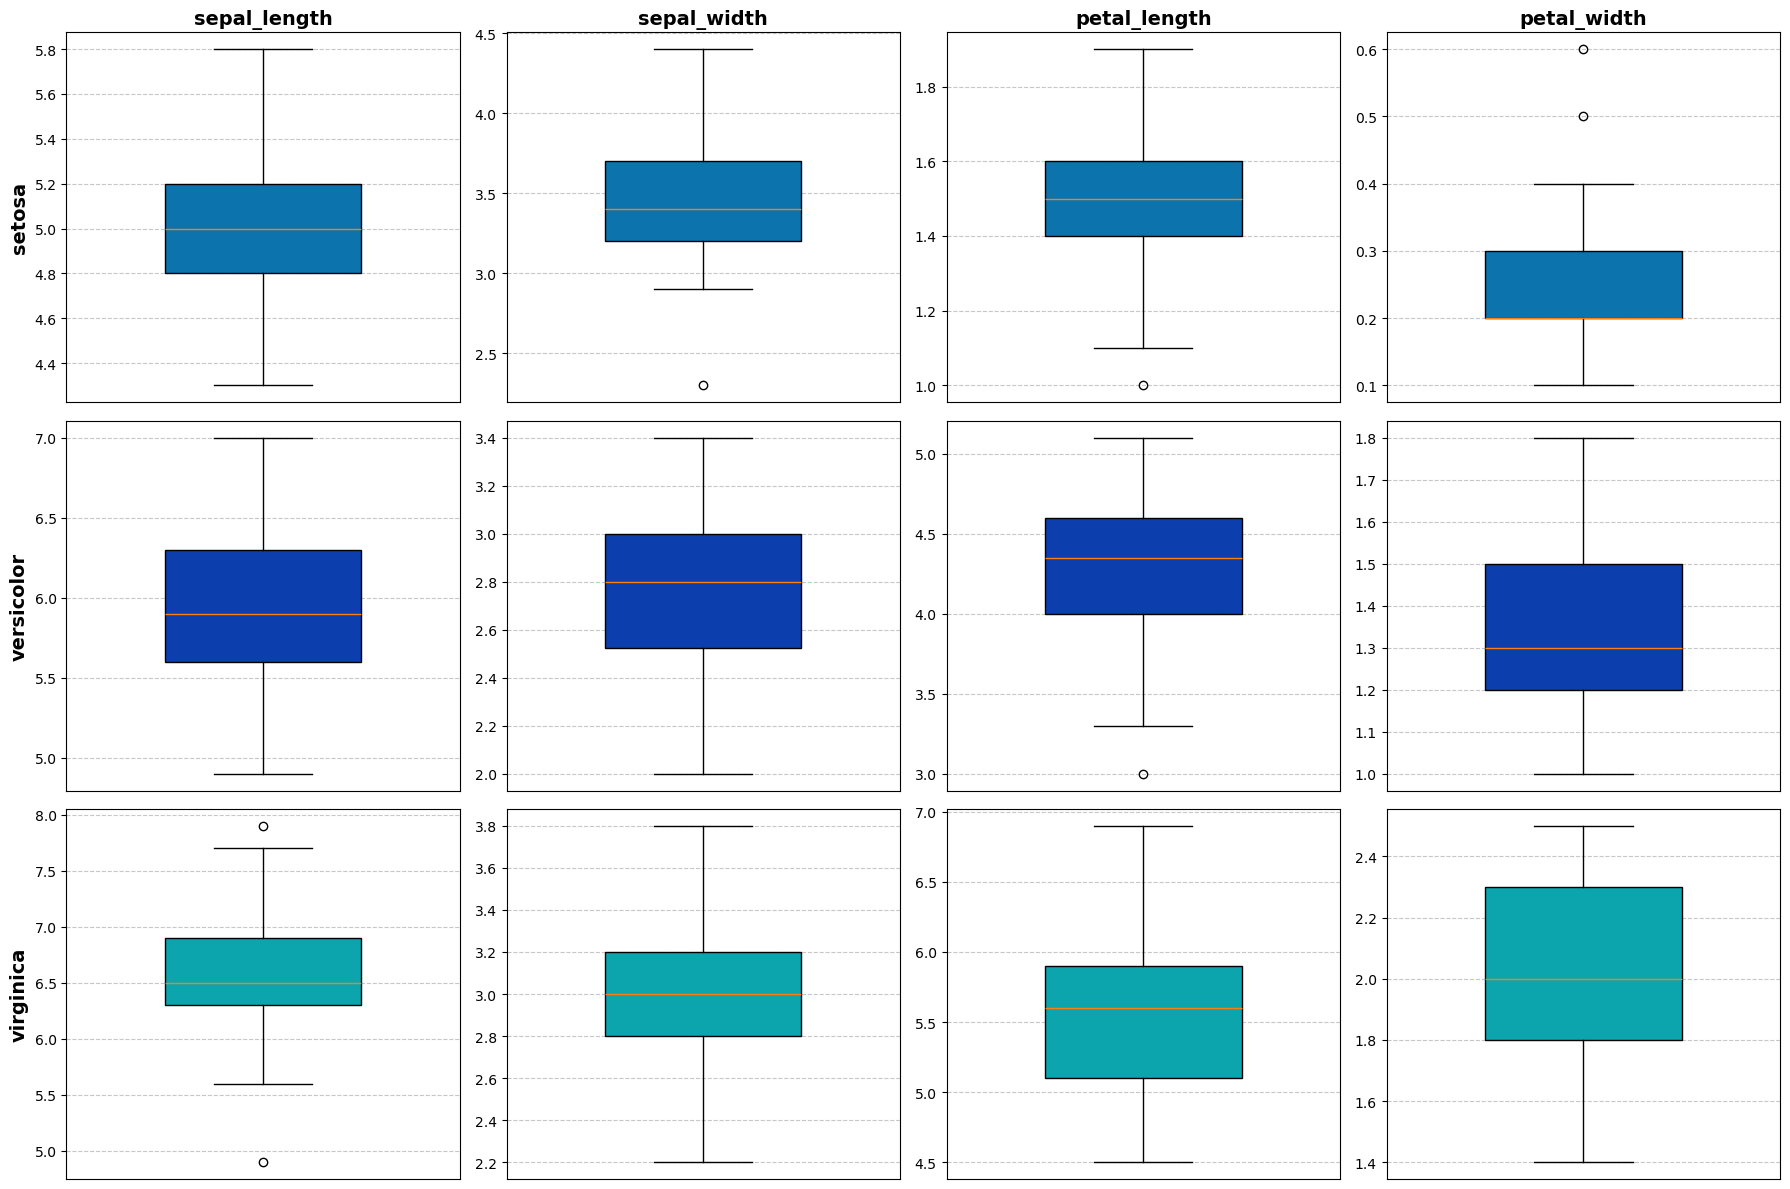

In [51]:
# Plot do boxplot dos atributos preditivos de cada especie
# Mapeando o índice das linhas para o nome da espécie
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['species'] = iris.index.map(lambda x: species_names[x // 50])

# Definindo uma paleta de cores
colors = ['#0C73AD', '#0C3FAD', '#0CA5AD']

# Lista de atributos
attributes = iris.columns[:-1]

# Criando subplots lado a lado para cada espécie
fig, axs = plt.subplots(len(species_names), len(attributes), figsize=(18, 12))

for i, species in enumerate(species_names.values()):
    subset = iris[iris['species'] == species][attributes]
    
    for j, attribute in enumerate(attributes):
        # axs[i, j].set_title(f'{attribute}')
        # axs[i, j].set_ylabel('Valores')
        axs[i, j].boxplot(subset[attribute], widths=0.5, patch_artist=True, boxprops=dict(facecolor=colors[i]))
 
        # Removendo os ticks do eixo x para melhor visualização
        axs[i, j].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        
        # Adicionando grade apenas no eixo y
        axs[i, j].grid(True, axis='y', linestyle='--', alpha=0.7)
        

# Configurando os títulos dos eixos x e y
for ax, col in zip(axs[0], attributes):
    ax.set_title(col, fontsize=14, fontweight='bold')

for ax, row in zip(axs[:,0], species_names.values()):
    ax.set_ylabel(f'{row}', fontsize=14, fontweight='bold') 

# Ajustando o layout
plt.tight_layout()
plt.show()




Após plotarmos os boxblot de cada atributo, podemos ver que existe a presença de outliers em alguns atributos <br>
Sendo notados nas: <br>
*  Setosa: Na petal_lenght e petal_width <br>
*  Versicolor: Na petal_lenght <br>
*  Virginica: Na sepal_lenght e sepal_width <br>

### g.

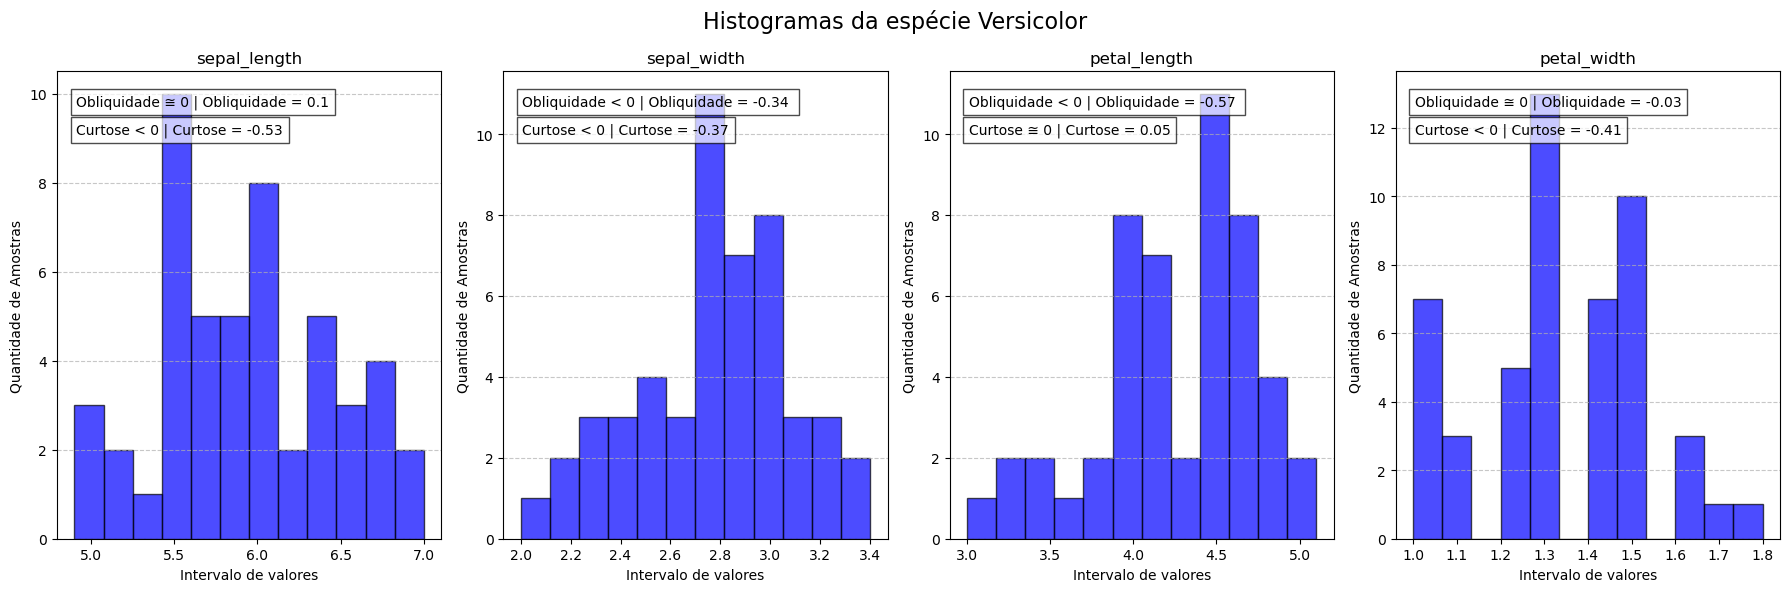

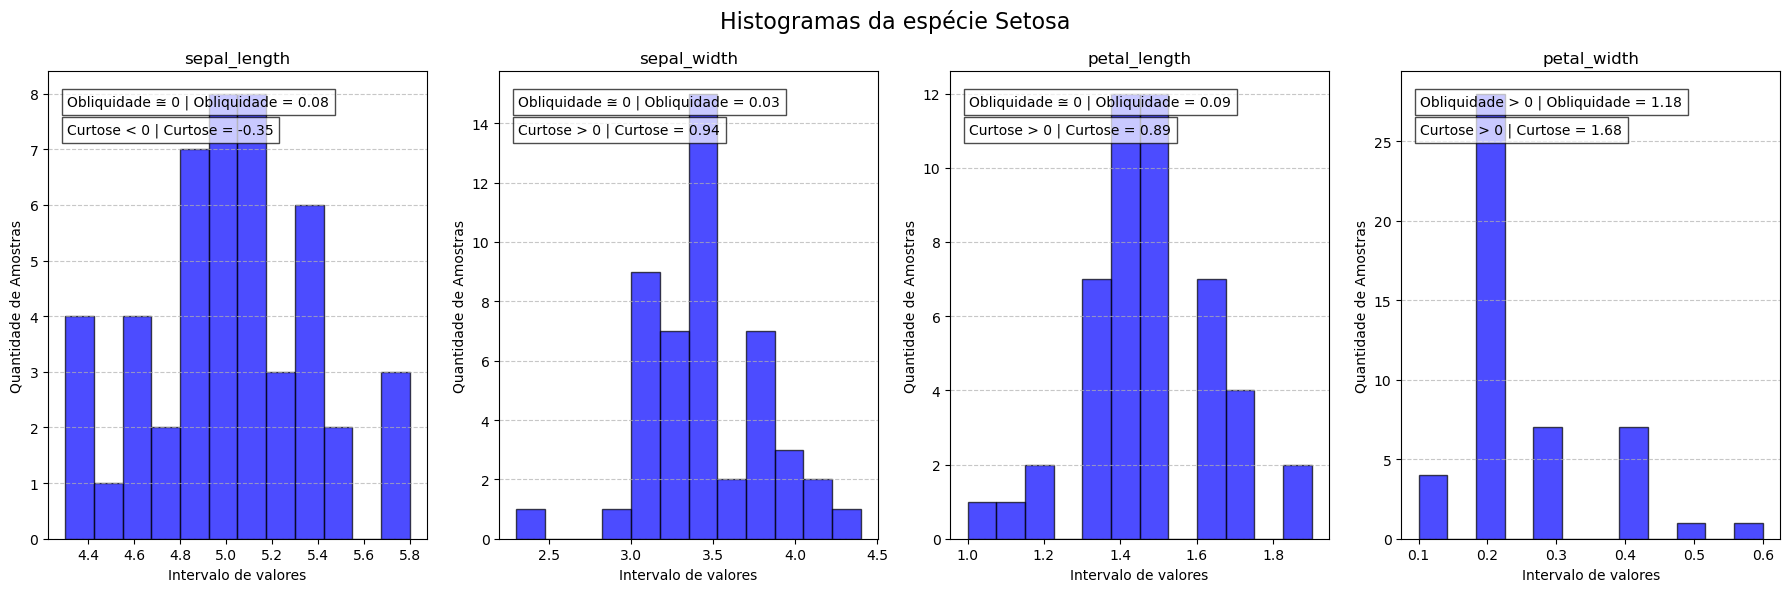

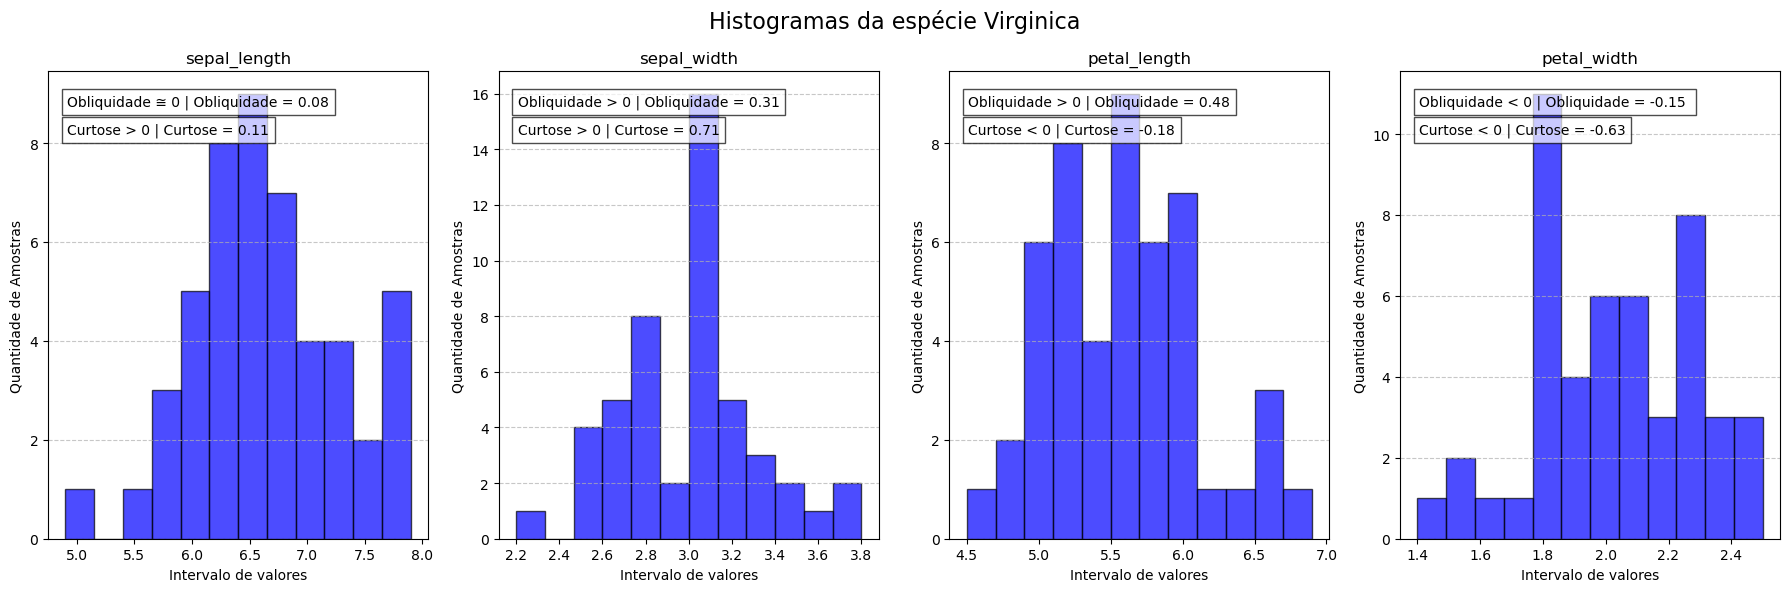

In [52]:
# Plote dos histogramas
Versicolor = iris[iris['species'] == 'versicolor']
Setosa = iris[iris['species'] == 'setosa']
Virginica = iris[iris['species'] == 'virginica']

def historic(db, species_name):
    # Definindo as colunas numéricas para plotar o histograma
    numeric_columns = [col for col in db.columns if db[col].dtype != 'object']
    
    fig, axs = plt.subplots(1, len(numeric_columns), figsize=(18, 6))
    
    # Plotando gráfico de colunas para cada coluna numérica
    for idx, column in enumerate(numeric_columns):
        
        # Definindo o número de bins e os limites do histograma
        num_bins = 12
        min_value = db[column].min()
        max_value = db[column].max()
        bin_width = (max_value - min_value) / num_bins
        
        # Calculando os limites dos bins
        bins = [min_value + i * bin_width for i in range(num_bins+1)]
        
        # Plotando o histograma
        axs[idx].hist(db[column], bins=bins, color='blue', alpha=0.7, edgecolor='black', density=False)

        # Calculando a obliquidade
        skewness_cal = ((((db[column] - db[column].mean()) / db[column].std()).pow(3).mean()) * 10)
        aproxx_skew = int(skewness_cal)
        if aproxx_skew != 0:
            if skewness_cal > 0: 
                skewness = f'Obliquidade > 0 | Obliquidade = {(skewness_cal/10).round(2)}'
            elif skewness_cal < 0:
                skewness = f'Obliquidade < 0 | Obliquidade = {(skewness_cal/10).round(2)} '
        else:
            skewness = f'Obliquidade ≅ 0 | Obliquidade = {(skewness_cal/10).round(2)}'

        # Calculando curtose
        kurt_cal = (db[column].kurtosis()).round(2)
        kurt_aprox = int(kurt_cal*10)
        if kurt_aprox != 0:
            if kurt_cal > 0: 
                kurt = f'Curtose > 0 | Curtose = {kurt_cal}'
            elif kurt_cal < 0:
                kurt = f'Curtose < 0 | Curtose = {kurt_cal}'
        else:
            kurt = f'Curtose ≅ 0 | Curtose = {kurt_cal}'            
        
        # Configurando o título e os rótulos dos eixos
        axs[idx].set_title(f'{column}')
        axs[idx].set_xlabel('Intervalo de valores')
        axs[idx].set_ylabel('Quantidade de Amostras')
        axs[idx].grid(True, axis='y', linestyle='--', alpha=0.7)

        axs[idx].text(0.05, 0.95, skewness, transform=axs[idx].transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
        axs[idx].text(0.05, 0.89, kurt, transform=axs[idx].transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
        
    plt.suptitle(f'Histogramas da espécie {species_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plotando para cada espécie
historic(Versicolor, 'Versicolor')
historic(Setosa, 'Setosa')
historic(Virginica, 'Virginica')



Observando os Histogramas, percebemos que petála, as medidas de uma das classes se mostra bem diferente das demais, sendo ela a setosa, afinal, em seu gráfico o intervalo de valores é único dentre os 3 tipos, isso também é visível no scatterplot feito pouco a cima. Em contrapartida, vemos que as medidas das sepálas são bem mais próximas umas das outras. Isso pode ser muito bem observado no gráfico abaixo:

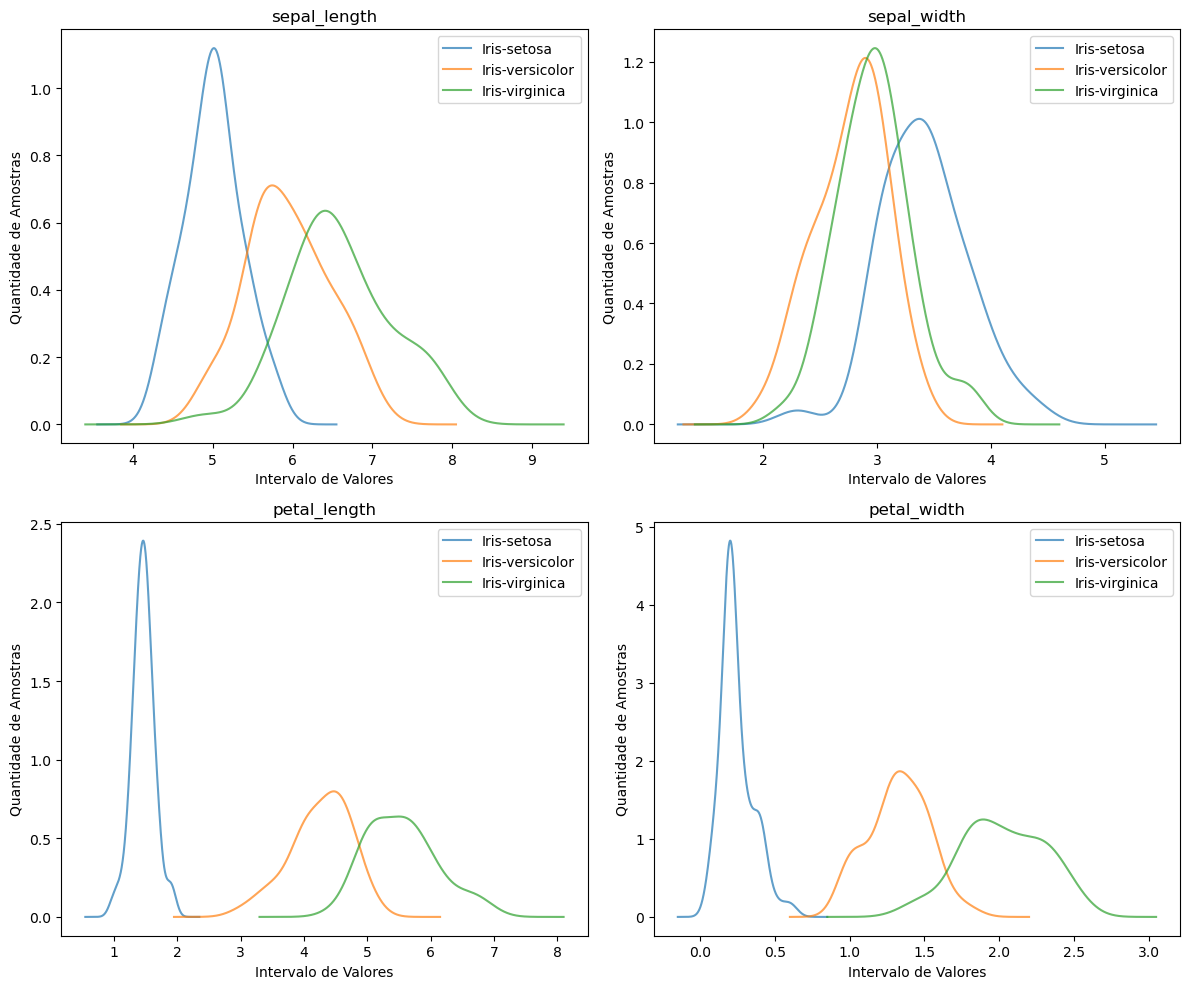

In [124]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    ax = axes[i // 2, i % 2]
    for species, data in iris.groupby('species'):
        data[feature].plot(kind='kde', ax=ax, label=species, alpha=0.7)
    ax.set_title(feature)
    ax.set_xlabel('Intervalo de Valores')
    ax.set_ylabel('Quantidade de Amostras')
    ax.legend()

plt.tight_layout()
plt.show()

### h.

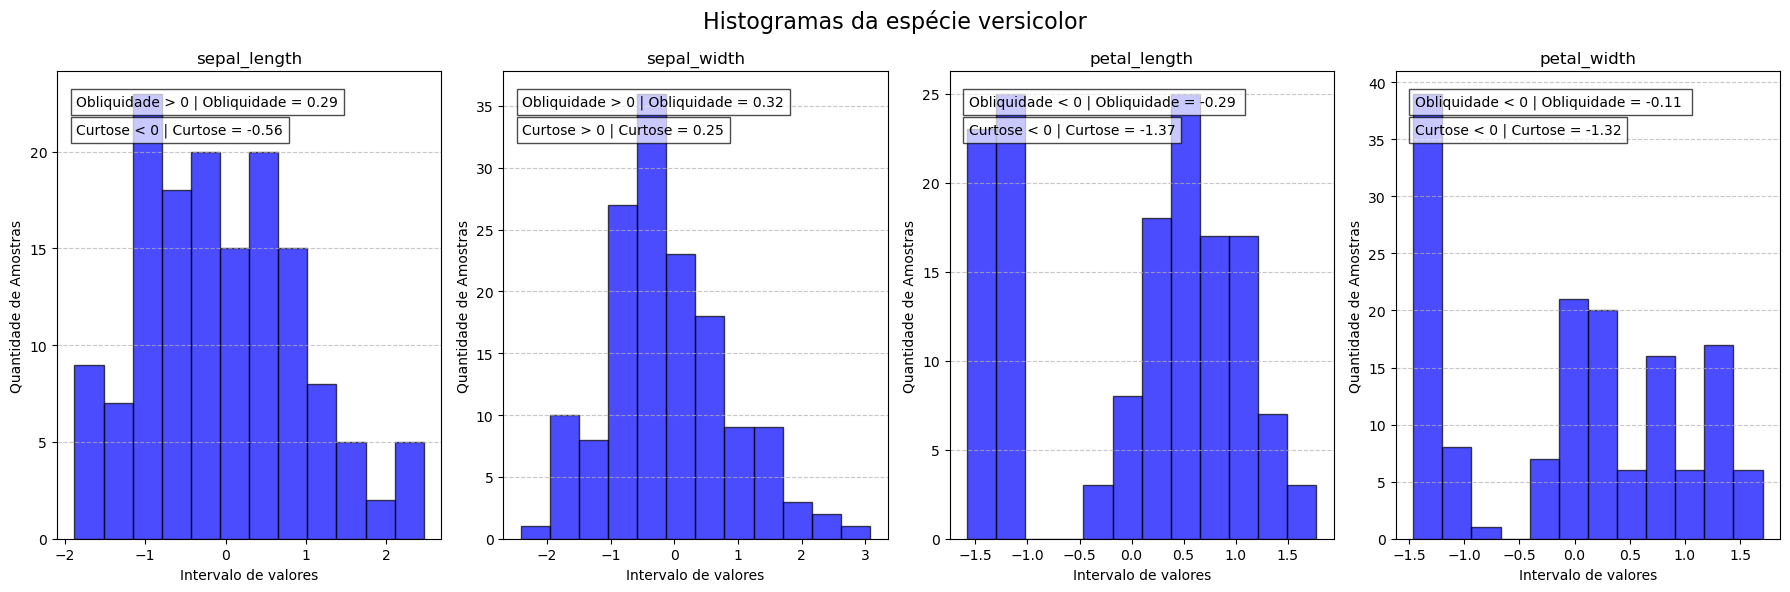

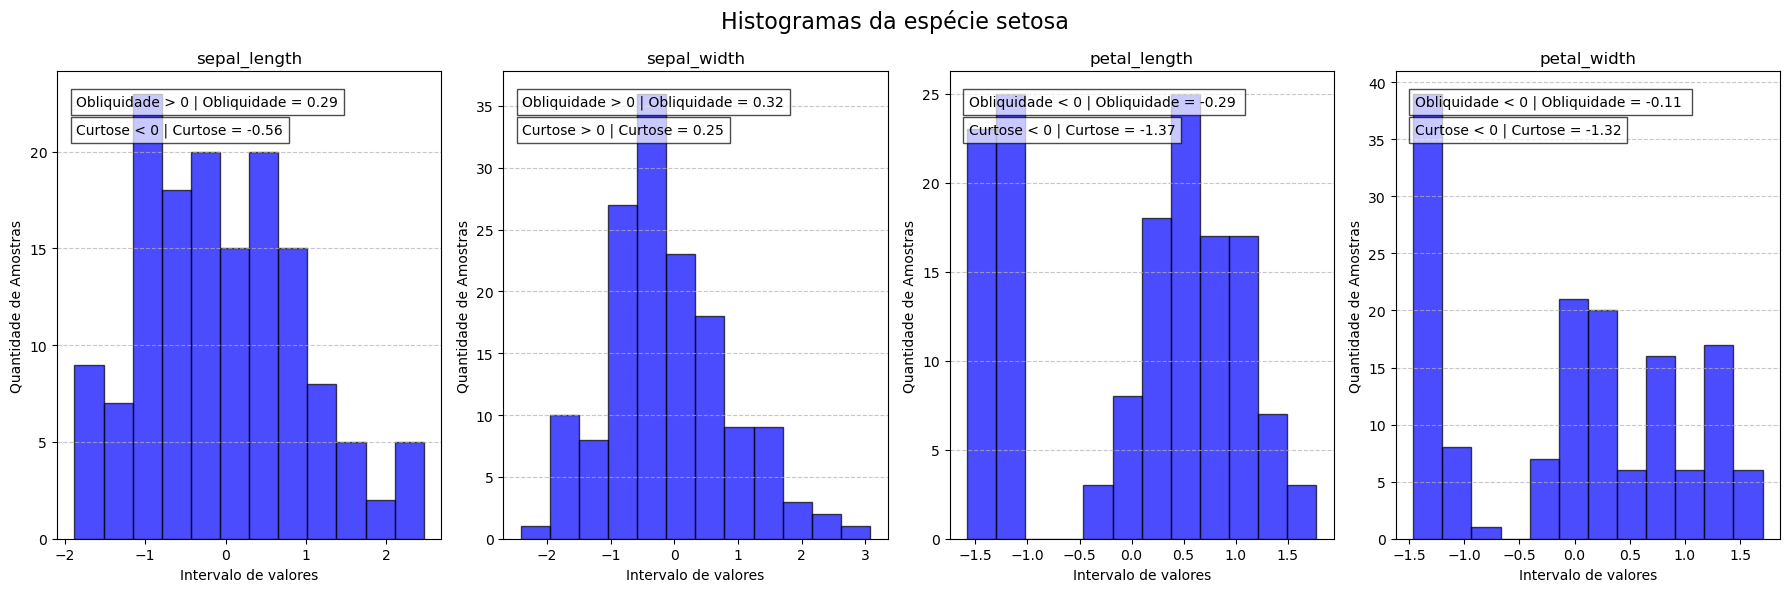

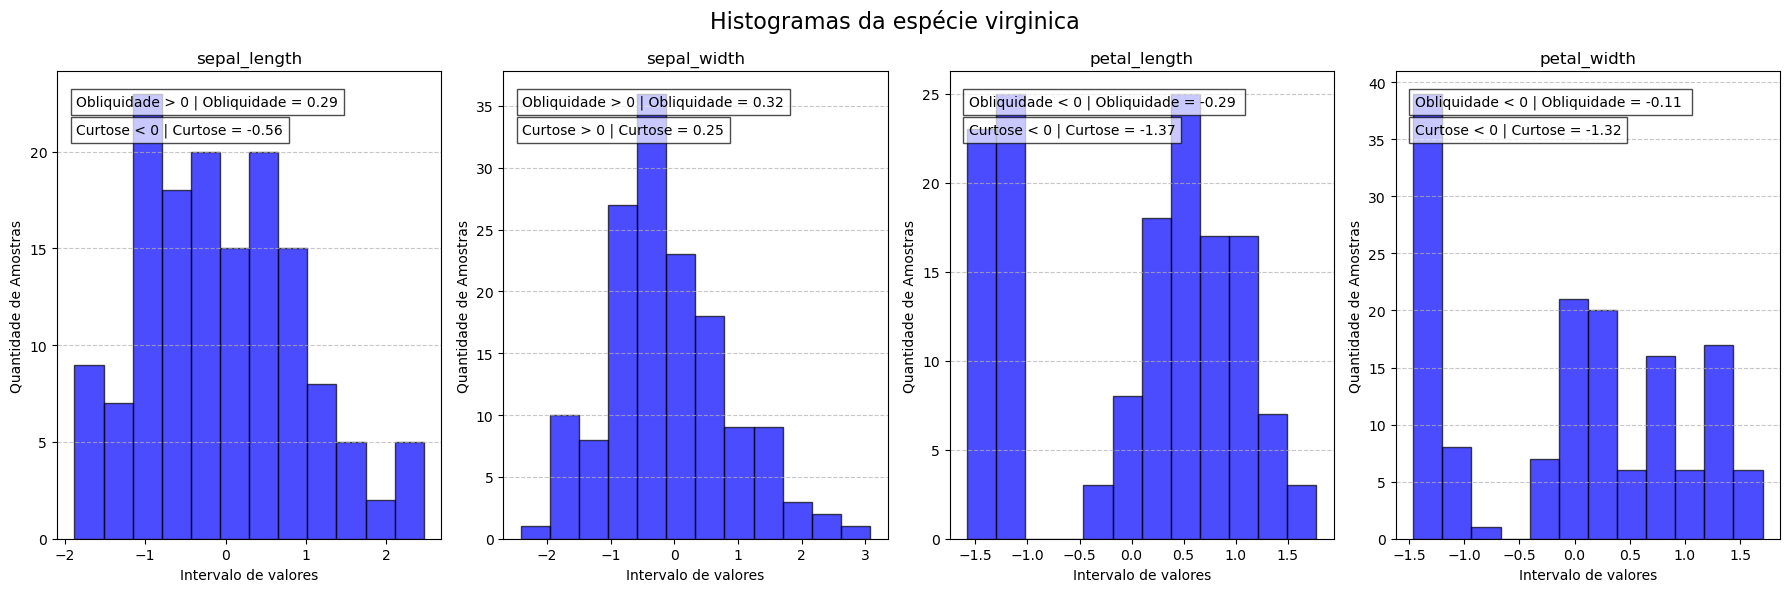

In [53]:
import pandas as pd

# Selecionar apenas os atributos quantitativos
atributos_quantitativos = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Calcular a média e o desvio padrão
media = atributos_quantitativos.mean()
desvio_padrao = atributos_quantitativos.std()

# Aplicar a padronização
atributos_padronizados = (atributos_quantitativos - media) / desvio_padrao

# print("Dados padronizados (Z-score normalization):")
# print(atributos_padronizados.head())

historic(atributos_padronizados, 'versicolor')
historic(atributos_padronizados, 'setosa')
historic(atributos_padronizados, 'virginica')



### i.

#### Utilizando o PCA e gerando o espaço de atributos

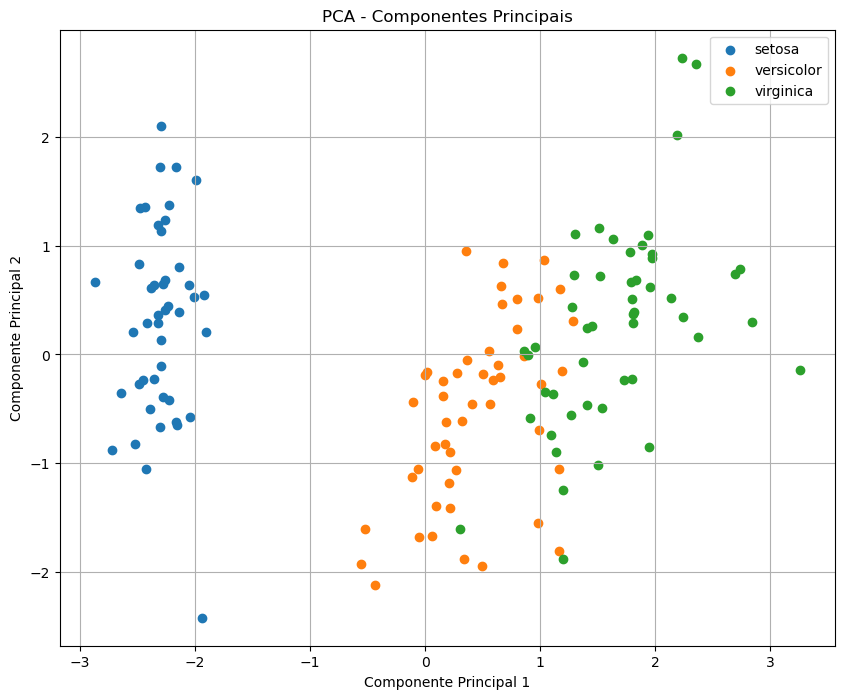

In [54]:
# Preencher NaN com a média
iris_filled = iris.fillna(iris.mean(numeric_only=True))

# Remover linhas que contêm NaN
iris_clean = iris_filled.dropna()

# Selecionar apenas os atributos quantitativos
atributos_quantitativos = iris_clean[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Calcular os quartis
Q1 = atributos_quantitativos.quantile(0.25)
Q3 = atributos_quantitativos.quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Definir os limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
atributos_sem_outliers = atributos_quantitativos[((atributos_quantitativos >= limite_inferior) & 
                                                  (atributos_quantitativos <= limite_superior)).all(axis=1)]

# Padronizar os atributos sem outliers
media = atributos_sem_outliers.mean()
desvio_padrao = atributos_sem_outliers.std()
atributos_padronizados = (atributos_sem_outliers - media) / desvio_padrao

# Aplicar PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais
componentes_principais = pca.fit_transform(atributos_padronizados)

# Criar DataFrame para os componentes principais
df_componentes = pd.DataFrame(data=componentes_principais, columns=['Componente Principal 1', 'Componente Principal 2'])

# Atribuir espécies corretamente ao DataFrame dos componentes principais
df_componentes['species'] = iris_clean.loc[atributos_sem_outliers.index, 'species'].values

# Plotar os dados no espaço dos componentes principais
plt.figure(figsize=(10, 8))
for especie in df_componentes['species'].unique():
    subset = df_componentes[df_componentes['species'] == especie]
    plt.scatter(subset['Componente Principal 1'], subset['Componente Principal 2'], label=especie)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Componentes Principais')
plt.legend()
plt.grid(True)
plt.show()


